## This notebook, as well as the others in the repository, will be used for the Capstone Project

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [53]:
train = pd.read_csv("https://raw.githubusercontent.com/LucianChiriac/Coursera_Capstone/master/titanic_datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucianChiriac/Coursera_Capstone/master/titanic_datasets/test.csv")

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Correlation checks


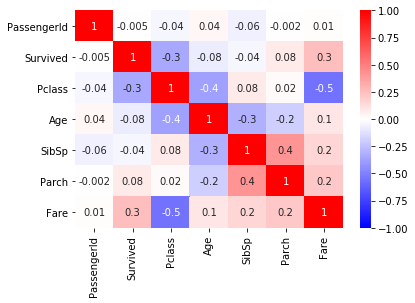

In [78]:
corr = train.corr()
sns.heatmap(corr, annot = True, fmt='.1g', vmin= -1, vmax = 1, center = 0, cmap = 'bwr')

#### To display only the diagonal half of the matrix:
- create a diagonal matrix using the numpy package: np.triu or np.tril for upper/lower diagonal
- pass on the diagonal matrix as a mask in the heatmap function

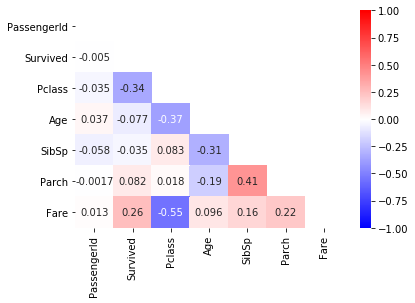

In [84]:
diag = np.triu(corr)
sns.heatmap(corr, annot= True, mask = diag, cmap = 'bwr', vmin=-1, vmax = 1, center =0)

#### One can notice that several variables were excluded from the correlation matrix because they are not numerical, but categorical (sex, Name, Embarked, Ticket, Cabin). To avoid this issue, we will one-hot encode some of the variables

Between the remaining variables, one can observe the following correlations:
- there seems to be a negative correlation between Pclass and Survived (the higher the class - i.e 3>2, lower survivability)
- signifficant negative correlations between Pclass and Age, and Pclass and Fare - interesting to check out
- positive correlation between Parch and SibSp

#### We redo the correlation matrix, this time one-hot encoding to include variables Sex and Embarked

In [113]:
# make a copy of the train dataset
train_copy = train.copy()
## Since one hot encoding only takes in numerical values, we first have to Label Encode the columns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() #create the LabelEncoder instance
# Now take each of the columns of interest, label encode their values and assign them to new columns
train_copy['Sex_cat'] = label.fit_transform(train_copy['Sex'])

# There are 2 NaN in Embarked, which will be replaced with S for the purpose of this analysis
train_copy['Embarked'].fillna("S", inplace=True)
train_copy['Embarked_cat'] = label.fit_transform(train_copy['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Embarked_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


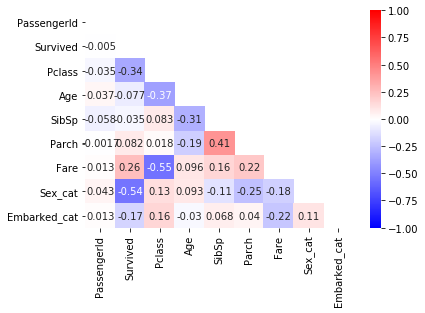

In [125]:
corr_copy = train_copy.corr()
mask = np.triu(corr_copy)
sns.heatmap(corr_copy, mask = mask, cmap = 'bwr', annot = True, vmin= -1, vmax = 1, center = 0)

In [129]:
train.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
E77              1
A14              1
C49              1
C62 C64          1
B73              1
Name: Cabin, Length: 148, dtype: int64